## 이미지처리

In [ ]:
#!pip install opencv-python
#!pip install matplotlib

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1952996589.py, line 7)

In [48]:
!dir

 C ����̺��� �������� �̸��� �����ϴ�.
 ���� �Ϸ� ��ȣ: CE6B-3D38

 c:\Users\user\Pictures\public ���͸�

2025-07-14  ���� 03:08    <DIR>          .
2025-07-11  ���� 04:44    <DIR>          ..
2025-07-10  ���� 09:51                35 .gitignore
2025-07-11  ���� 04:42    <DIR>          .ipynb_checkpoints
2025-07-10  ���� 04:45    <DIR>          ciw
2025-07-10  ���� 09:49    <DIR>          etc
2025-07-10  ���� 10:38               476 git���ɾ�.txt
2025-07-14  ���� 03:08           520,277 KakaoTalk_20250714_150832085.jpg
2025-07-11  ���� 10:57            41,281 py03.ipynb
2025-07-14  ���� 09:15            80,547 py04.ipynb
2025-07-14  ���� 11:29            45,100 py05.ipynb
2025-07-14  ���� 03:17         1,421,331 py06.ipynb
2025-07-14  ���� 03:10             1,876 py06_my.ipynb
2025-07-09  ���� 03:34            43,442 Untitled.ipynb
               9�� ����           2,154,365 ����Ʈ
               5�� ���͸�  23,957,995,520 ����Ʈ ����


평균 밝기:  126.94
이미지가 너무 어둡습니다.


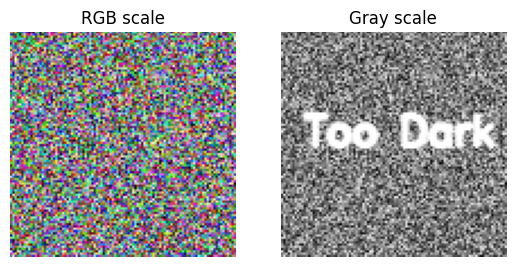

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # RGB -> BGR


# 1. numpy로 복사해서 즉석 이미지 생성
img = np.random.randint(0, 256, (100, 100, 3), dtype = np.uint8)

# 2. 그레이스케읿 변환 (색상 -> 밝기)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray

# 3. 이미지의 평균 밝기를 계산
mean_brightness = np.mean(gray)
print(f"평균 밝기: {mean_brightness: .2f}")

if mean_brightness < 127.5:
    print("이미지가 너무 어둡습니다.")
    gray = cv2.putText(gray.copy(), "Too Dark", (10,50), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255), 2, cv2.LINE_AA)
elif mean_brightness >= 127.9:
    print("이미지가 너무 밝습니다.")
    gray = cv2.putText(gray.copy(), "Too Bright", (10,50), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255), 2, cv2.LINE_AA)
else:
    print("정상이미지 입니다.")


plt.subplot(1, 2, 1)
plt.title("RGB scale")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gray scale")
plt.imshow(gray, cmap = "gray")
plt.axis('off')
plt.show()

## HSV와 이미지 처리

#### H - HUE(색상) 0 ~ 179(원래는 360 -> opencv는 180단계로 변환), 2로 나눔
- 빨간 : 0, 179 부근 (양끝)
- 노랑 : 30
- 하늘 : 90
- 파랑 : 120
- 보라 : 150
#### S - Saturation(채도)
- 0 ~ 255 : 값이 낮을 수록 회색(탁한색) 높을수록 원색
#### V - Value(명도)
- 0 ~ 255 : 색의 밝기, 낮을 수록 검정 (0), 높을 수록 밝은 상태 (255)

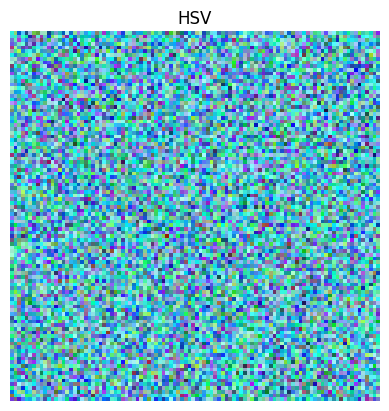

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. numpy로 복사해서 즉석 이미지 생성
img = np.random.randint(0, 256, (100, 100, 3), dtype = np.uint8)
# 2. 그레이스케일 변환 (색상 -> 밝기)
cimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. 이미지의 평균 밝기를 계산
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
out_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(hsv_img)
plt.title("HSV")
plt.axis('off')
plt.show()


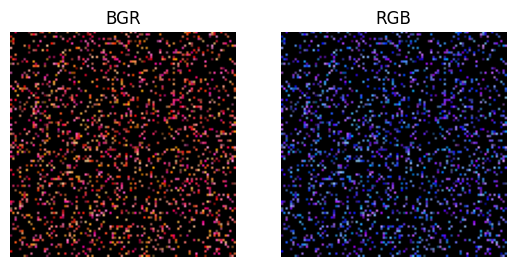

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. numpy로 복사해서 즉석 이미지 생성
img = np.random.randint(0, 256, (100, 100, 3), dtype = np.uint8)
# 2. 그레이스케일 변환 (색상 -> 밝기)
cimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. 이미지의 평균 밝기를 계산
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 파란색 범위를 정의
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])

# 마스크
mask = cv2.inRange(hsv_img, lower_blue, upper_blue)

blue_region = cv2.bitwise_and(img, img, mask=mask)
blue_region_rgb = cv2.cvtColor(blue_region, cv2.COLOR_BGR2RGB)


plt.subplot(1,2,1)
plt.imshow(blue_region)
plt.title("BGR")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(blue_region_rgb)
plt.title("RGB")
plt.axis('off')
plt.show()


(100, 100, 3)


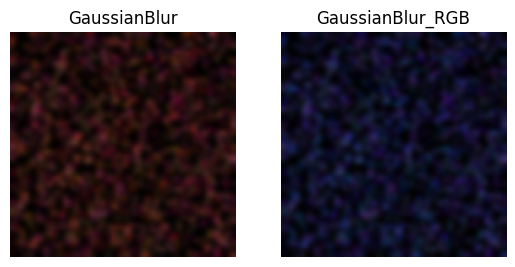

In [34]:
# 가우시안 블러 적용 (노이즈 제거)
blurred = cv2.GaussianBlur(blue_region, (7, 7), 0)
blurred_rgb = cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)  

print(blurred_rgb.shape)

plt.subplot(1,2,1)
plt.imshow(blurred)
plt.title("GaussianBlur")
plt.axis('off')



plt.subplot(1,2,2)
plt.imshow(blurred_rgb)
plt.title("GaussianBlur_RGB")
plt.axis('off')



plt.show()



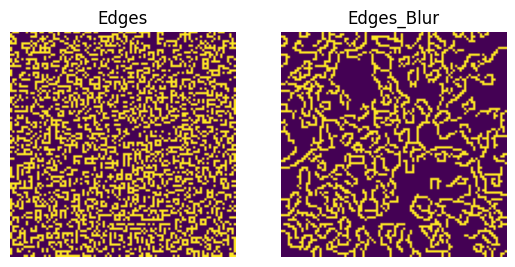

In [52]:
edges = cv2.Canny(blue_region_rgb, 50, 150)
edges_blur = cv2.Canny(blurred_rgb, 50, 150)


plt.subplot(1,2,1)
plt.imshow(edges)
plt.title("Edges")
plt.axis('off')



plt.subplot(1,2,2)
plt.imshow(edges_blur)
plt.title("Edges_Blur")
plt.axis('off')



plt.show()

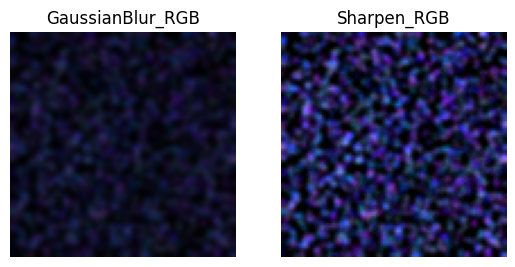

In [42]:
#blurred

# 3 x 3 선명화 커널
shape_kernel = np.array([[0, -2, 0],
                         [-2, 10, -2],   
                         [0, -2, 0]])

sharpen = cv2.filter2D(blurred, -1, shape_kernel)
sharpen_rgb = cv2.cvtColor(sharpen, cv2.COLOR_BGR2RGB)

plt.subplot(1,2,1)
plt.imshow(blurred_rgb)
plt.title("GaussianBlur_RGB")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sharpen_rgb)
plt.title("Sharpen_RGB")
plt.axis('off')
plt.show()

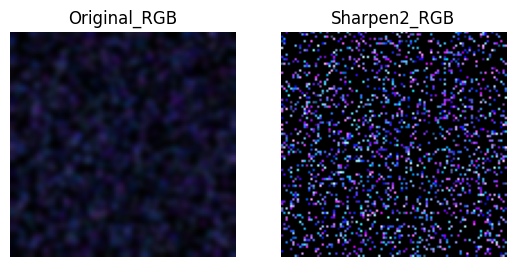

In [43]:
# 고급 선명화 기법

# blue_region
# blurred


sharpen2 = cv2.addWeighted(blue_region, 1.5, blurred, -0.5, 0)
sharpen2_rgb = cv2.cvtColor(sharpen2, cv2.COLOR_BGR2RGB)    


plt.subplot(1,2,1)
plt.imshow(blurred_rgb)
plt.title("Original_RGB")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sharpen2_rgb)
plt.title("Sharpen2_RGB")
plt.axis('off')
plt.show()